In [6]:
# ! pip install pyvis
! pip install -q netgraph


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
! python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [96]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from netgraph import Graph

import numpy as np
import pandas as pd

# Undirected Graphs

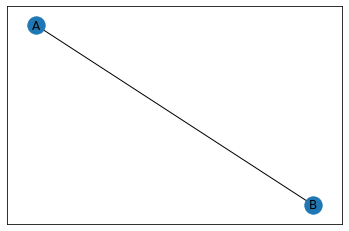

In [9]:
G = nx.Graph()
G.add_edge('A', 'B')

# G.pos = nx.spring_layout(G)

nx.draw_networkx(G)

In [10]:
G.nodes() # automatically added

NodeView(('A', 'B'))

In [11]:
G.edges()

EdgeView([('A', 'B')])

In [12]:
list(G.edges())

[('A', 'B')]

### Adding and removing edges weight

In [13]:
G.add_edge('A', 'B', weight=6)
G.edges()

EdgeView([('A', 'B')])

In [14]:
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 6})])

In [15]:
G.edges['A', 'B']

{'weight': 6}

In [16]:
G.edges['B', 'A']

{'weight': 6}

In [17]:
G['A']

AtlasView({'B': {'weight': 6}})

In [47]:
G.add_edge('A', 'D', weight=62)

In [48]:
G.remove_edge('A', 'D')

### Adding edge attributes

In [18]:
G.add_edge('B', 'C', relation='bridge')
G.edges()

EdgeView([('A', 'B'), ('B', 'C')])

In [19]:
G.edges['B', 'C']

{'relation': 'bridge'}

### Visualize weights and attributes

{('A', 'B'): Text(-0.47164162410334265, 0.4001986861539593, '9th Avenue'),
 ('B', 'C'): Text(0.5000000000000001, -0.4242614155619127, '10th Avenue')}

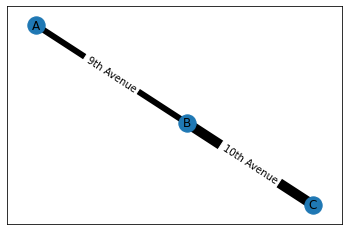

In [23]:
G = nx.Graph()
G.add_edge('A', 'B', weight=6, relation='9th Avenue')
G.add_edge('B', 'C', weight=10, relation='10th Avenue')

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])

labels = nx.get_edge_attributes(G,'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [24]:
net = Network('700px', '700px', notebook=True)

In [25]:
edges_length = {(a, b): w/10 for a, b, w in G.edges(data='weight')}
edges_length

{('A', 'B'): 0.6, ('B', 'C'): 1.0}

### Visualizing Distance (with netgraph)

/home/ismail/.local/lib/python3.10/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


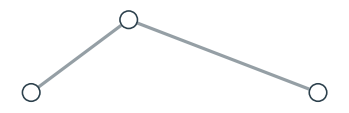

In [26]:
net.from_nx(G)
fig, ax = plt.subplots()

Graph(list(edges_length.keys()), node_layout='geometric', node_layout_kwargs=dict(edge_length=edges_length), ax=ax)
ax.set_aspect('equal')
plt.show()

### Adding node properties

In [38]:
G.add_node('A', role="President")

In [39]:
G.nodes(data=True)

NodeDataView({'A': {'size': 10, 'country': 'Morocco', 'role': 'President'}, 'B': {'size': 10}, 'C': {'size': 10}})

In [40]:
G['A']

AtlasView({'B': {'relation': '9th Avenue', 'width': 6}})

In [41]:
G.add_node('A', country="Morocco")

In [42]:
G.nodes(data=True)['A']

{'size': 10, 'country': 'Morocco', 'role': 'President'}

# Directed Graphs

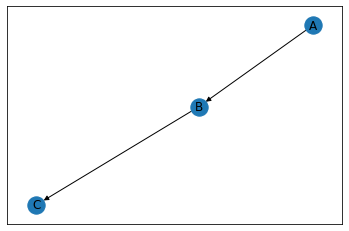

In [27]:
D = nx.DiGraph()
D.add_edge('A', 'B')
D.add_edge('B', 'C')

nx.draw_networkx(D)

In [141]:
D.is_directed()

True

In [28]:
('A', 'B') in D.edges()

True

In [29]:
('B', 'A') in D.edges()

False

In [30]:
D.edges()

OutEdgeView([('A', 'B'), ('B', 'C')])

## Multigraphs

Multigraphs are graphs that can have multiple edges between the same nodes

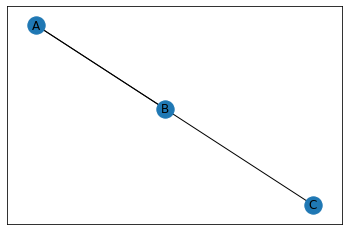

In [31]:
M = nx.MultiGraph()
M.add_edge('A', 'B', relation="family", weight=6)
M.add_edge('B', 'A', relation="family", weight=8)
M.add_edge('C', 'B', relation="family", weight=10)

pos = nx.spring_layout(M)
nx.draw_networkx(M, pos)

# labels = nx.get_edge_attributes(M,'weight')
# nx.draw_networkx_edge_labels(M, pos, edge_labels=labels)
# !! draw_networkx_edge_labels does not support multiedges. !!

In [32]:
# listing all edges between A and B
M['A']['B']

AtlasView({0: {'relation': 'family', 'weight': 6}, 1: {'relation': 'family', 'weight': 8}})

In [33]:
M['A']['B'][0]['weight'] = 5
M['A']['B'][0]['weight']

5

### Directed Multigraph

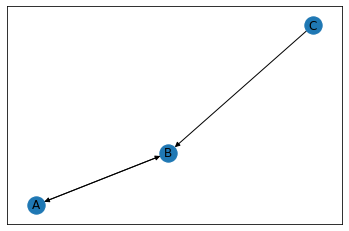

In [34]:
DM = nx.MultiDiGraph()
DM.add_edge('A', 'B', relation="family", weight=6)
DM.add_edge('B', 'A', relation="family", weight=8)
DM.add_edge('C', 'B', relation="family", weight=10)

pos = nx.spring_layout(DM)
nx.draw_networkx(DM, pos)


In [142]:
M.is_multigraph()

True

# Bipartite Graphs

A graph whose nodes can be split into two sets L and R such that every edge connects a node in L to a node in R

Eg. "Categories" (companies and workers, movies and directors, teams and fans..)

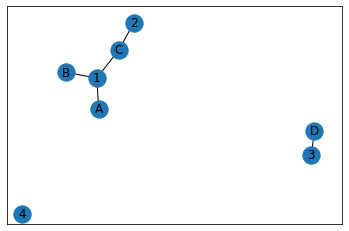

In [45]:
B = nx.Graph()
B.add_nodes_from(['A', 'B', 'C', 'D'], bipartite='L')
B.add_nodes_from(['1', '2', '3', '4'], bipartite='R')
B.add_edges_from([('A', '1'), ('B', '1'), ('C', '1'), ('C', '2'), ('D', '3')])

nx.draw_networkx(B)

<div class="alert alert-block alert-info"> You can study bipartite graphs by importing <b>bipartite</b> from <u>networkx.algorithms</u>.</div>

In [60]:
nx.bipartite.is_bipartite(B)

True

In [49]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C', 'D'])

True

In [50]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C'])

False

In [51]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C', 'D', '4'])

True

In [52]:
nx.bipartite.sets(B)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [57]:
B.add_edge('D', '4')
B.add_edge('C', '4')

In [58]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C', 'D', '4'])

False

In [59]:
nx.bipartite.sets(B)

({'A', 'B', 'C', 'D'}, {'1', '2', '3', '4'})

In [69]:
B.add_edge('A', '3')
B.add_edge('A', '4')
B.add_edge('B', '2')
B.add_edge('B', '3')
B.add_edge('C', '3')
B.add_edge('C', '4')

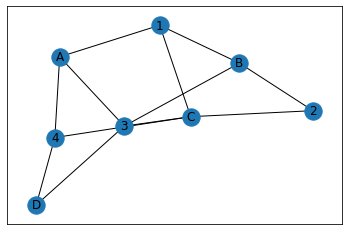

In [70]:
nx.draw_networkx(B)

In [71]:
nx.bipartite.is_bipartite_node_set(B, ['A', 'B', 'C', 'D'])

True

### L-bipartite Graph projection

Network of nodes in group L, where a pair of nodes is connected if they have a common neighbor in R in the bipartite graph

In [72]:
P = nx.bipartite.projected_graph(B, ['A', 'B', 'C', 'D'])

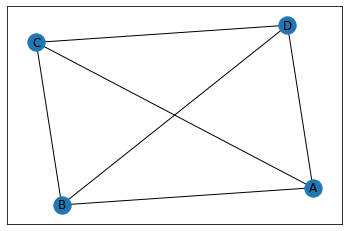

In [74]:
nx.draw_networkx(P)

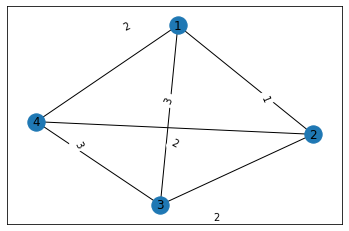

In [84]:
P2 = nx.bipartite.weighted_projected_graph(B, ['1', '2', '3', '4'])
nx.draw_networkx(P2)
edge_labels = {(N1, N2): w['weight'] for N1, N2, w in P2.edges(data=True)}
_ = nx.draw_networkx_edge_labels(P2, nx.spring_layout(P2), edge_labels=edge_labels)

# Loading Graphs

## Adjacency list

!! Nodes are not repeated after their row !!

In [87]:
G1 = nx.read_adjlist('data/adjacency_list.txt', nodetype=int)
G1.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

## Adjacency Matrix

In [130]:
# pd.DataFrame(nx.adjacency_matrix(G1).toarray()).to_csv('data/adjacency_matrix.csv', header=False, index=False)

In [126]:
adjacency_matrix = pd.read_csv('data/adjacency_matrix.csv', header=None).values
adjacency_matrix

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [127]:
adjacency_matrix.shape

(10, 10)

In [129]:
G2 = nx.Graph(adjacency_matrix)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 3), (1, 5), (3, 6), (4, 6), (4, 8), (6, 7), (8, 9)])

## Edge list (with node attributes, all nodes are connected)

In [133]:
G4 = nx.read_edgelist('data/edge_list.txt', data=[('weight', int)])
list(G4.edges(data=True))

[('0', '1', {'weight': 4}),
 ('0', '2', {'weight': 3}),
 ('0', '3', {'weight': 2}),
 ('0', '5', {'weight': 6}),
 ('1', '3', {'weight': 2}),
 ('1', '6', {'weight': 5}),
 ('3', '4', {'weight': 3}),
 ('5', '4', {'weight': 1}),
 ('5', '8', {'weight': 6}),
 ('4', '7', {'weight': 2}),
 ('8', '9', {'weight': 1})]

### Pandas DataFrame (same format as Edge List)

In [139]:
G_df = pd.read_csv('data/edge_list.txt', delim_whitespace=True, header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [140]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
list(G5.edges(data=True))

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 2}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3}),
 (5, 4, {'weight': 1}),
 (5, 8, {'weight': 6}),
 (4, 7, {'weight': 2}),
 (8, 9, {'weight': 1})]

# Example

In [143]:
! head -5 data/chess_graph.txt

1 2 0	885635999.999997
1 3 0	885635999.999997
1 4 0	885635999.999997
1 5 1	885635999.999997
1 6 0	885635999.999997


In [146]:
chess = nx.read_edgelist('data/chess_graph.txt', data=[('outcome', int), ('timestamp', float)], create_using=nx.MultiDiGraph())

In [148]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [150]:
list(chess.edges(data=True))[:10]

[('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'outcome': 0, 'timestamp': 906660000.0})]

In [154]:
games_played = dict(chess.degree())
games_played

{'1': 48,
 '2': 112,
 '3': 85,
 '4': 12,
 '5': 18,
 '6': 95,
 '7': 9,
 '8': 20,
 '9': 142,
 '10': 4,
 '11': 2,
 '12': 70,
 '13': 148,
 '14': 153,
 '15': 23,
 '16': 3,
 '17': 115,
 '18': 45,
 '19': 27,
 '20': 12,
 '21': 65,
 '22': 6,
 '23': 41,
 '24': 72,
 '25': 72,
 '26': 2,
 '27': 3,
 '28': 41,
 '29': 8,
 '30': 115,
 '31': 23,
 '32': 146,
 '33': 67,
 '34': 52,
 '35': 22,
 '36': 118,
 '37': 30,
 '38': 39,
 '39': 79,
 '40': 26,
 '41': 71,
 '42': 200,
 '43': 10,
 '44': 77,
 '45': 74,
 '46': 41,
 '47': 92,
 '48': 45,
 '49': 58,
 '50': 9,
 '51': 90,
 '52': 4,
 '53': 167,
 '54': 80,
 '55': 35,
 '56': 87,
 '57': 48,
 '58': 29,
 '59': 111,
 '60': 43,
 '61': 107,
 '62': 74,
 '63': 7,
 '64': 171,
 '65': 43,
 '66': 203,
 '67': 39,
 '68': 23,
 '69': 4,
 '70': 15,
 '71': 55,
 '72': 10,
 '73': 19,
 '74': 144,
 '75': 22,
 '76': 20,
 '77': 71,
 '78': 18,
 '79': 122,
 '80': 4,
 '81': 29,
 '82': 29,
 '83': 58,
 '84': 32,
 '85': 35,
 '86': 13,
 '87': 52,
 '88': 61,
 '89': 123,
 '90': 58,
 '91': 100,
 '9

In [157]:
max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]

print(f'Player {max_key} played {max_value} games')

Player 461 played 280 games


In [158]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

,white,black,outcome
0,1,2,"{'outcome': 0, 'timestamp': 885635999.999997}"
1,1,3,"{'outcome': 0, 'timestamp': 885635999.999997}"
2,1,4,"{'outcome': 0, 'timestamp': 885635999.999997}"
3,1,5,"{'outcome': 1, 'timestamp': 885635999.999997}"
4,1,6,"{'outcome': 0, 'timestamp': 885635999.999997}"


In [159]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])

In [160]:
df.head()

,white,black,outcome
0,1,2,0
1,1,3,0
2,1,4,0
3,1,5,1
4,1,6,0


In [161]:
won_as_white = df[df['outcome'] == 1].groupby('white').sum()
won_as_black = -df[df['outcome'] == -1].groupby('black').sum()

win_count = won_as_white.add(won_as_black, fill_value = 0)
win_count.head()

,outcome
1,7.0
100,7.0
1000,1.0
1002,1.0
1003,5.0


In [162]:
win_count.nlargest(5, 'outcome')

,outcome
330,109.0
467,103.0
98,94.0
456,88.0
461,88.0
